# Personality Clustering Project
## Problem Statement & Justification
Understanding personality types can help personalize services in HR, education, and wellness. We aim to use unsupervised learning to cluster individuals into Introvert, Ambivert, and Extrovert groups using behavioral data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Data Understanding (EDA)

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       28

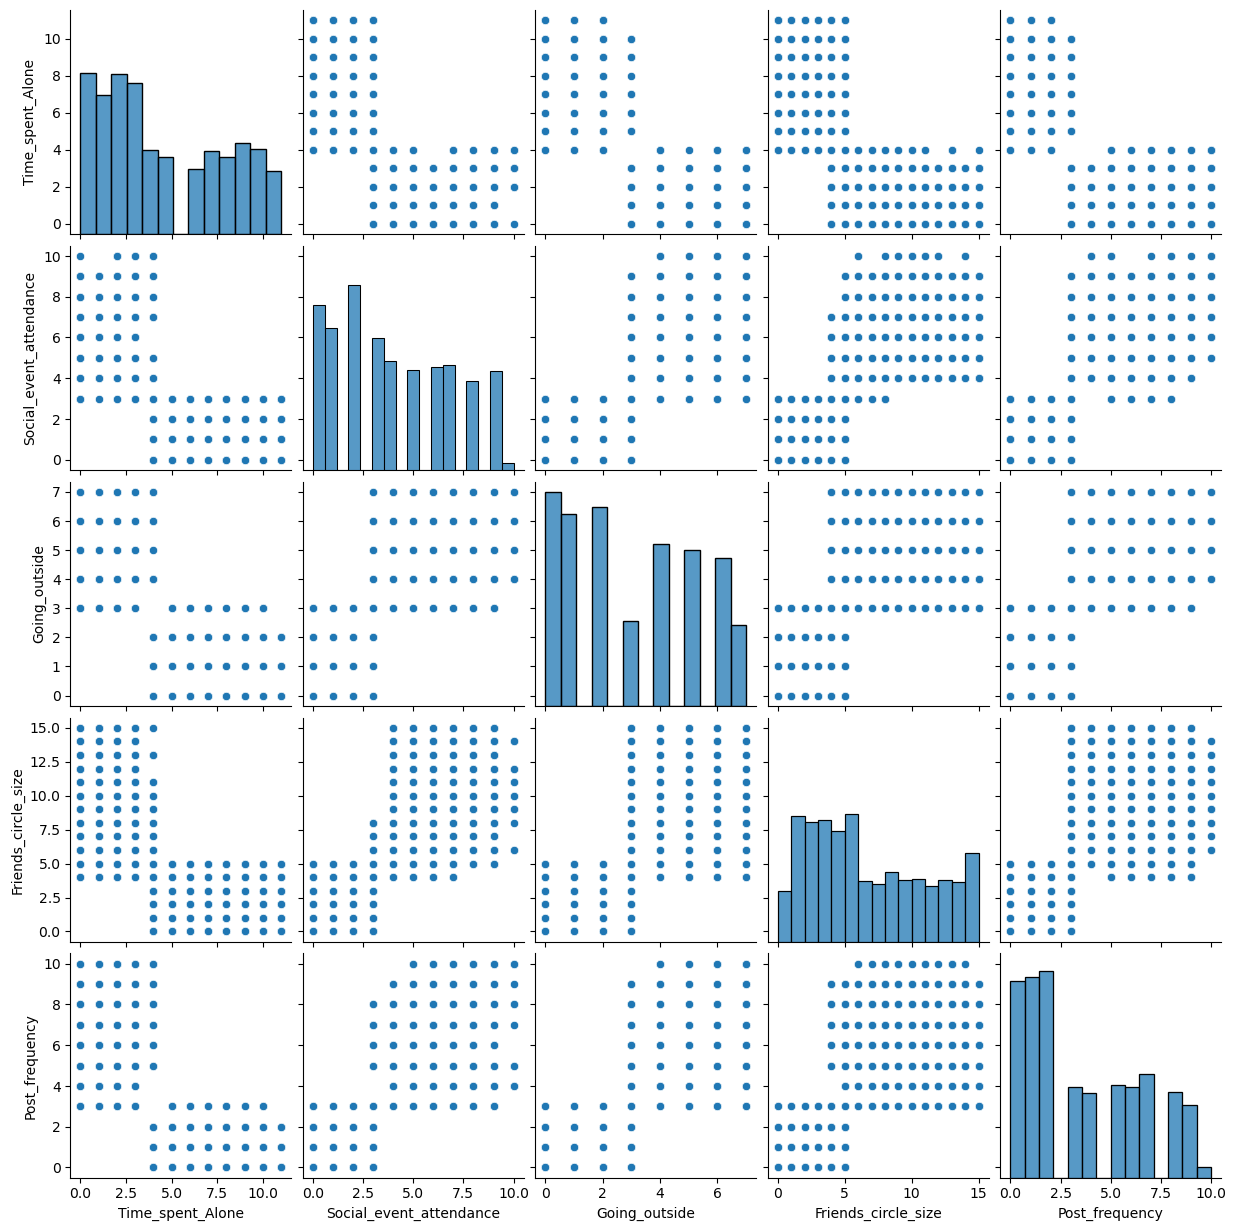

In [2]:
df = pd.read_csv('personality_dataset.csv')
print(df.head())
print(df.describe())
sns.pairplot(df.dropna())
plt.show()

## Data Preparation & Feature Engineering

In [3]:
# Define feature types
numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']

# Pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
X_processed = preprocessor.fit_transform(df)

## Feature Selection

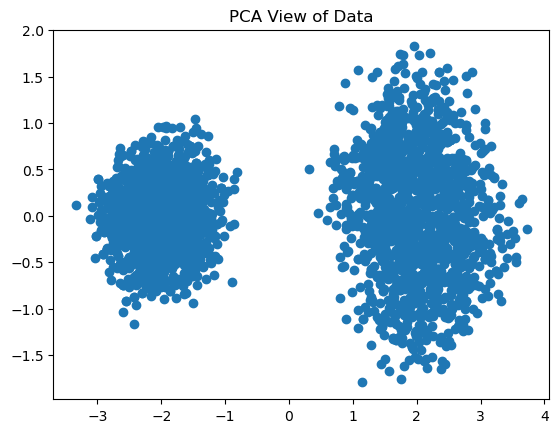

In [7]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('PCA View of Data')
plt.show()

## Modeling – Selection, Comparison, Tuning

In [8]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_processed)
df['Cluster'] = clusters
print('Silhouette Score:', silhouette_score(X_processed, clusters))

Silhouette Score: 0.42598211778684547


## Evaluation – Performance & Interpretation

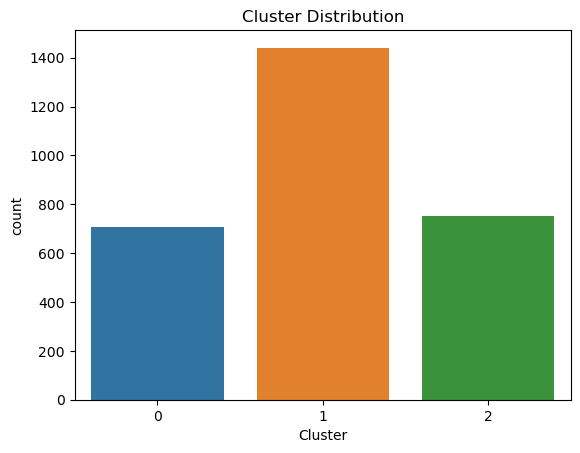

C:\Users\kanun\AppData\Local\Temp\ipykernel_31080\2469812789.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cluster').mean().T.plot(kind='bar', figsize=(10,6))


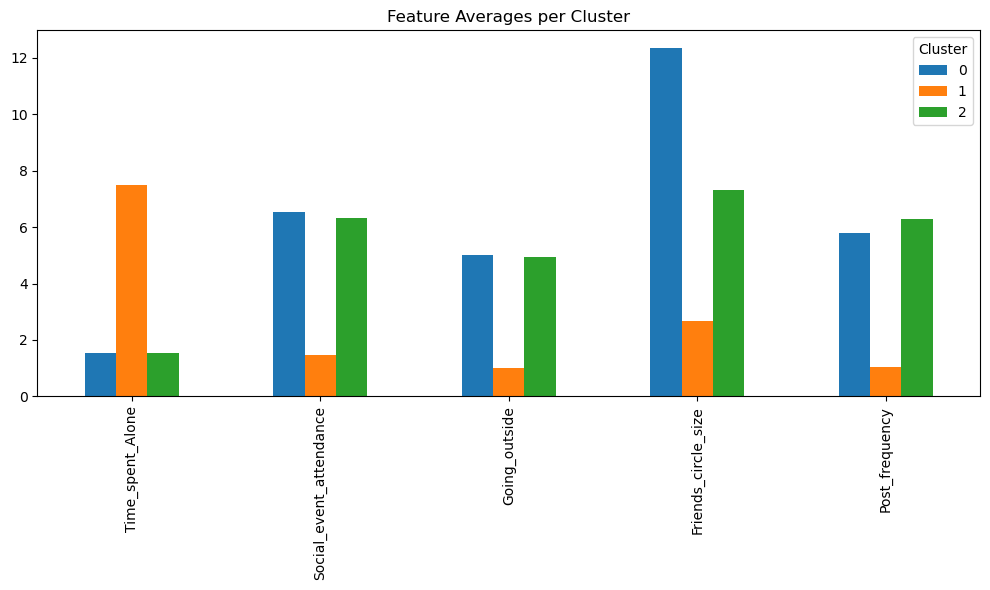

In [9]:
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.show()
df.groupby('Cluster').mean().T.plot(kind='bar', figsize=(10,6))
plt.title('Feature Averages per Cluster')
plt.tight_layout()
plt.show()

## Deployment Discussion

- The model can be deployed via a REST API (Flask) to serve cluster predictions.
- Frontend (Streamlit) allows users to input behavior data and get real-time personality profile prediction.
- Scalable and lightweight for integration in HR or mental health tools.

## Discussion & Conclusion

- We addressed the challenge of personality classification using unsupervised learning.
- The model identified 3 clear social behavior profiles that can guide personalization.
- It's a non-invasive, data-driven solution for better human understanding in tech-enabled services.